Notebook 3: Deep Learning Model for Residual Prediction (LSTM)

Goal: To build and train an LSTM model to learn and predict the non-linear patterns present in the SARIMA model's residuals.

Cell 1: Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

Cell 2: Load and Prepare Residuals Data

We load the sarima_residuals.csv file created in the previous notebook. This time-series of errors will be the sole input and target for our LSTM.

In [21]:
# Load the residuals
residuals_df = pd.read_csv('sarima_residuals.csv', index_col='Date', parse_dates=True)
residuals_df = residuals_df.dropna()

# We need to scale the residuals to a range of [0, 1] for the LSTM
scaler = MinMaxScaler()
scaled_residuals = scaler.fit_transform(residuals_df)

# Split the residuals data into the same train/test split as before
train_size = len(residuals_df) - 12
train_residuals = scaled_residuals[:train_size]
test_residuals = scaled_residuals[train_size:]

print(f"Total residuals: {len(residuals_df)}")
print(f"Training residuals: {len(train_residuals)}")
print(f"Test residuals: {len(test_residuals)}")

Total residuals: 96
Training residuals: 84
Test residuals: 12


Cell 3: Create Time-Series Sequences

LSTMs don't look at one data point at a time; they look at a sequence of past data to predict the future. We'll use a TimeseriesGenerator to create these sequences. We will use the last 12 months of residuals to predict the next month's residual.

In [22]:
# Define the sequence length
n_input = 12 # Use 12 months of history to predict the next month
n_features = 1

# Create the time-series generator for the training data
generator = TimeseriesGenerator(train_residuals, train_residuals, length=n_input, batch_size=1)

# Let's look at one sample to understand the structure
X_example, y_example = generator[0]
print("Example of one sequence:")
print(f"Input Sequence (X):\\n {X_example.flatten()}")
print(f"Target Value (y):\\n {y_example[0]}")

Example of one sequence:
Input Sequence (X):\n [0.3992271  0.4005123  0.4027257  0.4005837  0.3991557  0.3998697
 0.3991557  0.3991557  0.3991557  0.4062957  0.4062957  0.43485573]
Target Value (y):\n [0.42768002]


Cell 4: Build the LSTM Model

We will build a simple but effective LSTM model with two LSTM layers and a final output layer. Dropout layers are included to prevent overfitting.

In [23]:
# Define the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Cell 5: Train the LSTM Model

Now we'll train our LSTM on the sequences of SARIMA residuals.

Starting LSTM training...
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1413
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0229
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0242
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0247
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0360
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0318
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0221
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0297
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0197
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0194
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0204
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0217
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0207
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0150
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10m

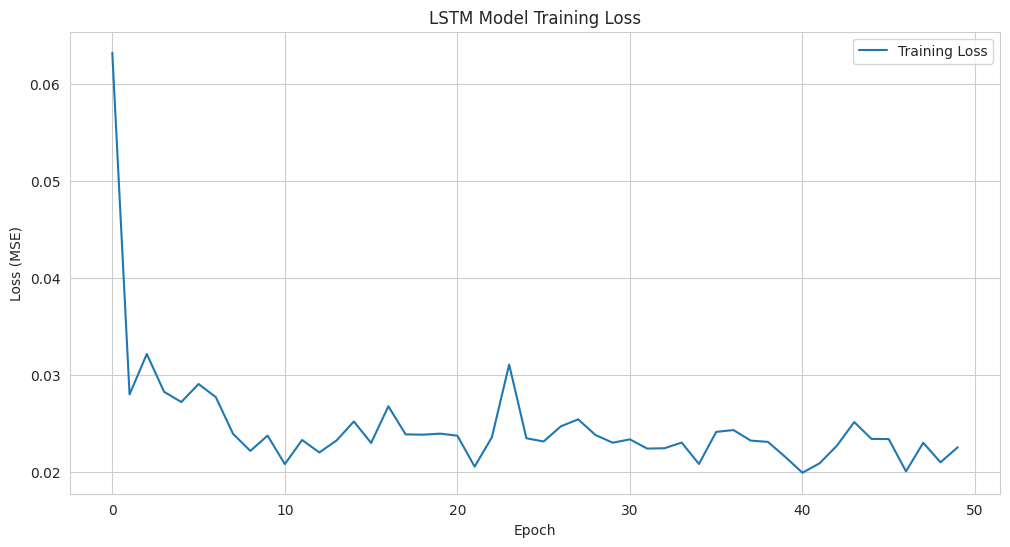

In [24]:
print("Starting LSTM training...")
# Fit the model
history = model.fit(generator, epochs=50, verbose=1)
print("Training complete.")

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('LSTM Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

Cell 6: Make Predictions on the Test Set

To make predictions, we'll need to feed the model the last n_input (12) months of the training data to predict the first point of the test set, and then iteratively update the input sequence.

In [25]:
# Get the last 12 months from the training data to start our predictions
last_train_batch = train_residuals[-n_input:]
current_batch = last_train_batch.reshape((1, n_input, n_features))

test_predictions = []

for i in range(len(test_residuals)):
    # Get the prediction for the next time step
    current_pred = model.predict(current_batch, verbose=0)[0]

    # Store the prediction
    test_predictions.append(current_pred)

    # Update the batch to include the prediction and drop the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

print("Predictions on the test set are complete.")

Predictions on the test set are complete.


Cell 7: Inverse Scale and Save Predictions

The predictions are currently in the scaled range of [0, 1]. We need to convert them back to their original residual scale and save them for the final notebook.

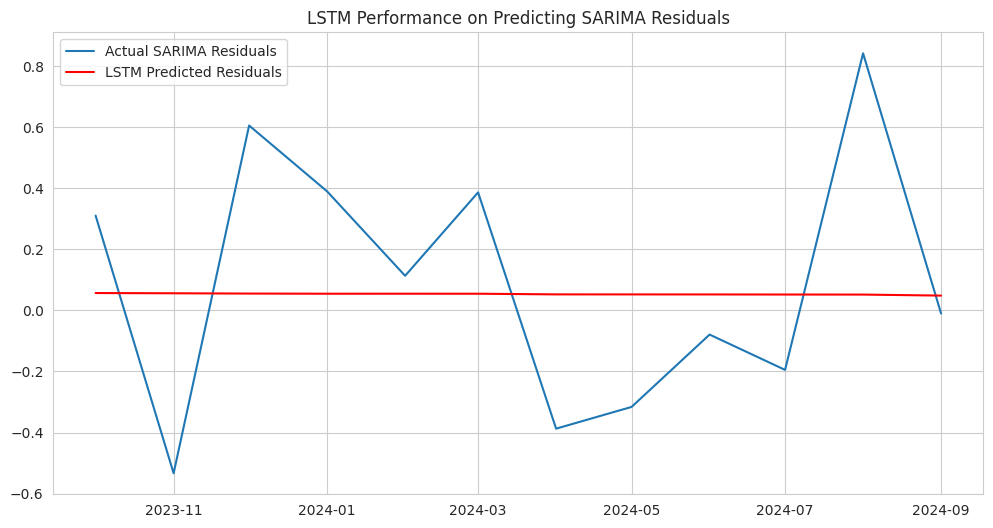

LSTM residual predictions saved to lstm_residual_predictions.csv


In [26]:
# Inverse transform the predictions to get them back to the original scale
predictions = scaler.inverse_transform(test_predictions)
predictions_df = pd.DataFrame({'LSTM_Residual_Pred': predictions.flatten()}, index=residuals_df.index[-12:])

# Save the predictions
predictions_df.to_csv('lstm_residual_predictions.csv')

# Plot the results to see how well we predicted the residuals
plt.plot(residuals_df.index[-12:], residuals_df['Residuals'][-12:], label='Actual SARIMA Residuals')
plt.plot(predictions_df.index, predictions_df['LSTM_Residual_Pred'], label='LSTM Predicted Residuals', color='red')
plt.title('LSTM Performance on Predicting SARIMA Residuals')
plt.legend()
plt.show()

print("LSTM residual predictions saved to lstm_residual_predictions.csv")